In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=101)

In [5]:
X, y = data

In [8]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [9]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [10]:
feat = pd.DataFrame(X)

In [12]:
feat = pd.concat([feat, z_noise], axis=1)

In [14]:
feat.columns = ['X1', 'X2', 'X3']

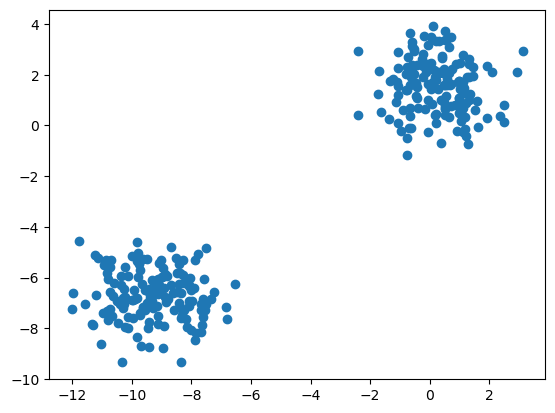

In [16]:
plt.scatter(feat['X1'], feat['X2'])

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


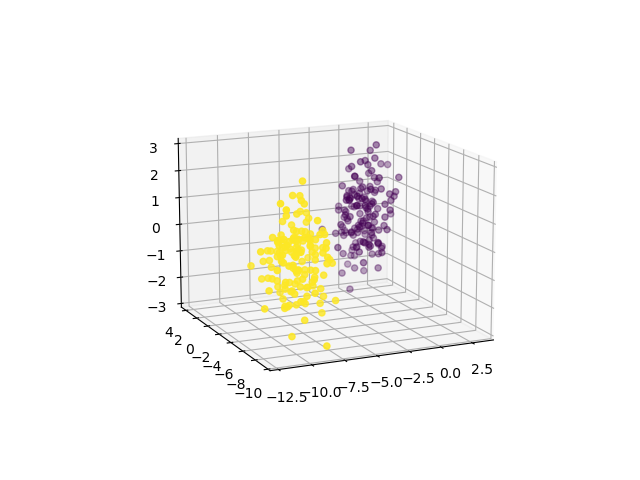

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d') 
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense

In [25]:
from tensorflow.keras.optimizers import SGD

In [27]:
encoder = Sequential()

encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [28]:
decoder = Sequential()

decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [29]:
autoencoder = Sequential([encoder, decoder])

In [43]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(feat)

In [46]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 995us/step - loss: 0.1877
Epoch 2/5
10/10 [==============================] - 0s 778us/step - loss: 0.1683
Epoch 3/5
10/10 [==============================] - 0s 778us/step - loss: 0.1506
Epoch 4/5
10/10 [==============================] - 0s 778us/step - loss: 0.1366
Epoch 5/5
10/10 [==============================] - 0s 888us/step - loss: 0.1366


In [47]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 889us/step


In [48]:
encoded_2dim.shape

(300, 2)

<IPython.core.display.Javascript object>


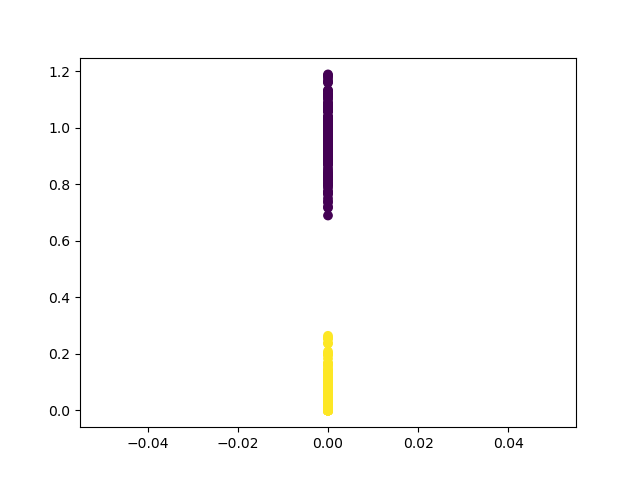

In [49]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)